![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 09: GWR
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Advanced Data Analysis (18-05-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-advanced-data-analysis-2020/blob/master/S09_GeoSpatial/09_Advanced_Data_Analysis_GWR_NOTsolved.ipynb)

**Resources (code patched, refactored, updated and adapted from):**
* O'Reilly library
* ESA documentation
* Pysal and MGWR documentation


---



---

# GWR: Geographic Weighted Regression

Geographically weighted regression (GWR) is a spatial statistical technique that, like aspatial local
regression, recognizes that traditional ‘global’ regression models may be limited when processes vary
by context. GWR captures process’s spatial heterogeneity (i.e., process variation by spatial context)
via an operationalization of **Tobler’s first law of geography**: *“everything is related to everything
else, but near things are more related than distant things”*

## Ensemble of local linear models
An ensemble of local linear models
are calibrated at any number of locations by ‘borrowing’ nearby data. The result is a surface of
location-specific parameter estimates for each relationship in the model that may vary spatially, as well
as a single bandwidth parameter that provides intuition about the geographic scale of the processes.

In addition, **GWR typically provides increased model fit and reduced residual spatial autocorrelation
compared to a traditional ‘global’ regression that assumes relationships are constant over space**

## GWR Implemented over Pysal
A recent extension to the GWR framework allows each relationship in the model to vary at a
unique spatial scale and is therefore known as multiscale (MGWR. **MGWR is much less restrictive
in its assumptions than GWR**, since the relationship between the response and a covariate is allowed to
vary locally, vary regionally, and or not vary at all. Eliminating the restriction that all relationships vary
at the same spatial scale can minimize over-fitting, reduce bias in the parameter estimates, and mitigate
concurvity (i.e., collinearity due to similar functional transformations). Therefore, MGWR has been
suggested as the default local model specification when using GWR to investigate process spatial
heterogeneity and scale.

However, MGWR does not have a predict method yet, so we will not be using it in this class (it will be implemented in the near future)


## Setup

### Install Rtree (in colab is the hard way)

**NOT NEEDED IN LOCAL IF YOU HAVE RTREE INSTALLED!!!!!!!!!!!!!!!!!!!**

In [0]:
!apt-get install -qq curl g++ make

In [2]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1314k      0 --:--:-- --:--:-- --:--:-- 1314k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [4]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [5]:
!make

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE_FEATURES_H=1 -DHAVE_GETTIMEOFDAY=1 -DHAVE_MEM

In [6]:
!make install

Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
Making i

In [7]:
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [8]:
!pip install rtree

     |████████████████████████████████| 71kB 3.3MB/s 
  Created wheel for rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21766 sha256=bdd278b83c3be1306eb73ba1f870effd5029771a8a7d338e64983d36e4ade409
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built rtree


### Install other libraries

In [9]:
!pip install geopandas

     |████████████████████████████████| 931kB 4.9MB/s 
     |████████████████████████████████| 10.9MB 11.4MB/s 
     |████████████████████████████████| 14.7MB 308kB/s 


In [10]:
!pip install rasterio

     |████████████████████████████████| 18.2MB 1.3MB/s 


In [11]:
!pip install contextily

In [13]:
!pip install mgwr

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 266kB 9.2MB/s 
     |████████████████████████████████| 2.4MB 11.4MB/s 
  Created wheel for spglm: filename=spglm-1.0.7-cp36-none-any.whl size=38803 sha256=a766ba55afb6153c231e992f25b68472cc9c991aaeb760f7b8b65de0422e7ee7
  Stored in directory: /root/.cache/pip/wheels/fd/b6/a1/ec1b6ff60fd5b2daf0dbc4277b7dda97bad0d03624ee8c5592
  Created wheel for libpysal: filename=libpysal-4.2.2-py2.py3-none-any.whl size=2451705 sha256=131387e8a527047345e34b92c4c308daa7e95870953b0fc3e2d9da012adcb63b
  Stored in directory: /root/.cache/pip/wheels/6b/89/fa/c9b34a3f52a38f185a0bb23c5bfbcb7415ba4bda219aa42e6d
Successfully built spglm libpysal


### Import stuff

In [0]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx

## Understanding GWR
GWR calibrates a separate regression model at each location through a data-borrowing scheme
that distance-weights observations from each location serving as a regression point. A GWR model
may be specified as:

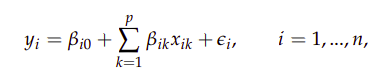

* $yi$ is the dependent variable at location i, 
* $βi0$ is the intercept coefficient at location i, 
* $xik$ is the k-th explanatory variable at location i, 
* $βik$ is the k-th local regression coefficient for the kth explanatory variable at location i, 
* $ei$ is the random error term associated with location i. 

$i$ is typically indexed by two-dimensional geographic coordinates, $(ui, vi)$, indicating the location of the regression point.



In matrix form, the GWR estimator for local parameter estimates at site $i$ is:

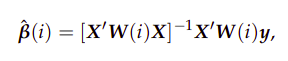


* $X$ is a $n$ by $k$ matrix of explanatory variables:
    * $W(i) = diag[w1(i), ..., wn(i)]$ is the $n$ by $n$ diagonal weights matrix that weights each observation based on its distance from location $i$, 
* $βˆ(i)$ is a $k$ by 1 vector of coefficients, 
* $y$ is a $k$ by 1 vector of observations of the dependent variable


The model inputs, $X$, $y$, and the geographic coordinates $(u, v)$, can be prepared as follows:

## Load Datasets

### Load Georgia Dataset
Loads Georgia datasets and generate plot of Georgia counties

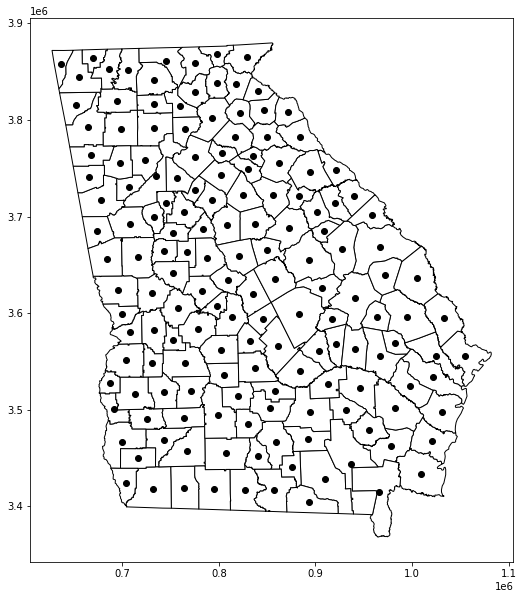

In [15]:
georgia = gpd.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize = (10, 10))
georgia.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
georgia.centroid.plot(ax = ax, c = 'black')
plt.savefig('/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 09 - GWR and Satellite Classification/georgia_shp')
plt.show()

#### Georgia Dataset Explanation



* **PctBach**: Percentage of the population with a bachelor’s degree or higher
* **PctFB**: Percentage of the population that was born in a foreign country
* **PctBlack**: Percentage of the population that identifies as African American
* **PctRural**: Percentage of the population that is classified as living in a rural area



In [16]:
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,AreaKey,geometry
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764,13001,"POLYGON ((931869.062 3545540.500, 934111.625 3..."
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916,13003,"POLYGON ((867016.312 3482416.000, 884309.375 3..."
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787,13005,"POLYGON ((914656.875 3512190.000, 924718.375 3..."
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765,13007,"POLYGON ((744258.625 3480598.500, 765025.062 3..."
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553,13009,"POLYGON ((832974.188 3677273.500, 834048.688 3..."


### Prepare dataset inputs

In [0]:
g_y = georgia['PctBach'].values.reshape((-1, 1))
g_X = georgia[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia['X']
v = georgia['Y']
g_coords = list(zip(u, v))

In [18]:
g_coords

[(941396.6, 3521764),
 (895553.0, 3471916),
 (930946.4, 3502787),
 (745398.6, 3474765),
 (849431.3, 3665553),
 (819317.3, 3807616),
 (803747.1, 3769623),
 (699011.5, 3793408),
 (863020.8, 3520432),
 (859915.8, 3466377),
 (809736.9, 3636468),
 (844270.1, 3595691),
 (979288.9, 3463849),
 (827822.0, 3421638),
 (1023145.0, 3554982),
 (994903.4, 3600493),
 (971593.8, 3671394),
 (782448.2, 3684504),
 (724741.2, 3492653),
 (1008480.0, 3437933),
 (964264.9, 3598842),
 (678778.6, 3713250),
 (670055.9, 3862318),
 (962612.3, 3432769),
 (1059706.0, 3556747),
 (704959.2, 3577608),
 (653026.6, 3813760),
 (734240.9, 3794110),
 (832508.6, 3762905),
 (695793.9, 3495219),
 (745538.8, 3711726),
 (908046.1, 3428340),
 (724646.8, 3757187),
 (894463.9, 3492465),
 (808691.8, 3455994),
 (942527.9, 3722100),
 (839816.1, 3449007),
 (705457.9, 3694344),
 (783416.5, 3623343),
 (805648.4, 3537103),
 (635964.3, 3854592),
 (764386.1, 3812502),
 (732628.4, 3421800),
 (759231.9, 3735253),
 (860451.4, 3569933),
 (80003

## Distance-Weighting Scheme
In order to construct  W(i)  and compute  βˆ(i)  using Equation it is necessary to select a distance-weighting scheme. This involves first selecting a kernel function and kernel type. Next, the bandwidth parameter that controls the intensity of the weighting performed by the kernel must be selected. Finally, the model parameters can be estimated along with several diagnostics.

## Distance-Weighting Scheme

In order to construct $W(i)$ and compute $βˆ(i)$ using Equation it is necessary to select a
distance-weighting scheme. This involves first selecting a kernel function and kernel type. Next,
the bandwidth parameter that controls the intensity of the weighting performed by the kernel must be
selected. Finally, the model parameters can be estimated along with several diagnostics.

### Kernel Functions
To calculate the weights matrix, a kernel function is applied to the distances between observations
and calibration points. This kernel places more emphasis on observations that are closer than those
farther away.


#### Kernels available in MGWR package
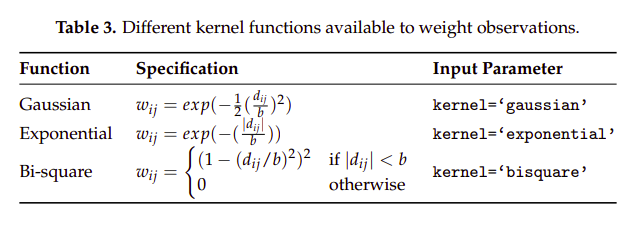

#### Issues with kernel activation functions
The default value of the kernel is 'bisquare'. A potential issue with the Gaussian
and exponential kernel functions is that all observations retain non-zero weight, regardless of how
far they are from the calibration location. This means that even faraway observations can remain
influential for moderate-to-large bandwidth parameters. **This is why the MGWR package includes the bi-square as default**

Plus, using the bi-square kernel avoids the issue of the distance to the calibration point, it also has a **intuitive interpretation**: the bandwith parameter is the distance or number of nearest neighbors away in space that the remaining observations has no influence.

As you can see in the plot below, for bi-square kernels, even large bandwiths can result in observations that are weighted to zero.

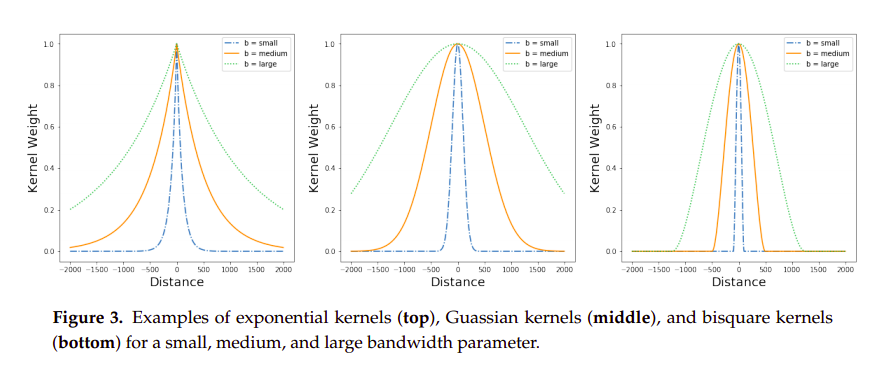

#### Kernel types
There are two type of kernel available in Pysal's MGWR package: **fixed** and **adaptive**

**FIXED KERNEL** --> this fixes the
bandwidth parameter so that for each calibration location, the data are weighted with the same
intensity, whereby this intensity is characterized by a measure of distance from the calibration
location. A limitation of fixed-bandwidth kernels is that there can be calibration issues when there are
sparsely-populated regions of a study area

**ADAPTIVE KERNEL** --> A nearest-neighbor definition of bandwidth ensures that the same number of
observations are available for each local regression since the distance that spans the nearest-neighbors
adapts from location to location. An adaptive bandwidth kernel is able to **better handle irregularly shaped study areas**, non-uniform
spatial distributions of observations and edge effects and is therefore the default behavior in mgwr.

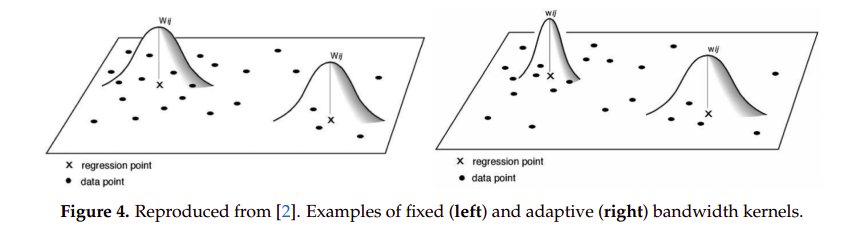

## Bandwith Selection

Bandwidth selection is carried out either by optimizing a model fit criterion or by manual
specification. **Optimal selection** is preferred when there is no theoretical guide to manually specify the
bandwidth.

The **Sel_BW** class provides the functionality to apply different optimization
routines and model fit criterion.

An instance of the Sel_BW class is instantiated by passing the
model inputs, $X$, $y$, and the geographic coordinates $(u, v)$.

The default values of the **Sel_BW** are:

* bi-square activation function
* adaptive kernel
* projected coordinates (Euclidean distances) UTM

⚠️⚠️ Other spherical coordinates (like WGS84 or long, lat) can be accomodated by setting 
`spherical=True`

After the **Sel_BW** is set we need to run the search criterion. The default settings is to use a corrected Akaike information criterion (AICc) as the model fit criterion.

Another search optimization routine
can alternatively be selected by setting `search_method = 'interval'` and setting the interval option to
the desired sampling interval. This is also used to go faster at some points.

There are other types of model fit criteria, in any case **AICc is preferred** as e it penalizes smaller bandwidths that result in more complex models that
consume more degrees of freedom






### Other fit criterion available

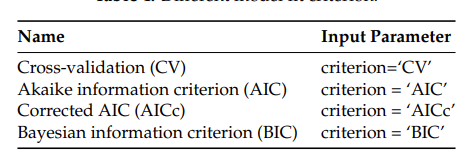

### Default BW selector

In [0]:
# Instantiate bandwidth selection object
selector = Sel_BW(g_coords, g_y, g_X)

In [20]:
# Default golden section search using AICc criterion
bw = selector.search()
print(bw)

117.0


### BW selector with other options

In [21]:
# Interval search using AICc criterion
bw = selector.search(search_method = 'interval', 
                     interval = 2, 
                     bw_min = 101, 
                     bw_max = 150)
print(bw)

117


## Model Calibration
Model calibration is carried out by first instantiating a GWR model object. Then, the fit method
for the GWR object is called to fit the model. An important input that must be specified for GWR
calibration is the bandwidth parameter, which can be chosen via the optimal bandwidth selection
routine discussed above.

In [22]:
# Calibrate a GWR model for Georgia dataset using computationally selected~bandwidth
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

117.0


In [0]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [0]:
gwr_results = gwr_model.fit()

In [25]:
print(gwr_results.resid_ss)

1650.8596982770284


### Manually selecting the BW
The bandwidth can also be selected manually when there is a strong theoretical grounding or to
explore potential spatial heterogeneity


In [26]:
gwr_model = GWR(g_coords, g_y, g_X, 117)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

1650.8596982770284


In [27]:
 gwr_results.params

array([[ 1.42207115e+01,  1.05161777e+00,  1.86733341e-02,
        -8.96608774e-02],
       [ 1.37287965e+01,  7.60885753e-01,  3.11903966e-02,
        -8.66691043e-02],
       [ 1.41084244e+01,  9.43149998e-01,  2.33396704e-02,
        -8.95014776e-02],
       [ 1.36867702e+01,  7.03891929e-01,  1.67276341e-02,
        -7.55529306e-02],
       [ 1.33699605e+01,  3.30070571e+00, -5.54557855e-02,
        -5.06474791e-02],
       [ 1.33001357e+01,  3.32578922e+00, -2.75323491e-02,
        -6.31813315e-02],
       [ 1.33525549e+01,  3.30449009e+00, -3.02309528e-02,
        -6.22967501e-02],
       [ 1.22995107e+01,  3.29870614e+00, -1.60421720e-02,
        -5.61929043e-02],
       [ 1.29596680e+01,  9.66573545e-01,  3.14180056e-02,
        -7.83038866e-02],
       [ 1.34442395e+01,  7.01749085e-01,  3.24036118e-02,
        -8.27645714e-02],
       [ 1.40756916e+01,  2.75985087e+00, -5.27744820e-02,
        -5.57718347e-02],
       [ 1.33380775e+01,  1.91683997e+00, -9.42740238e-03,
      

### Exploring spatial heterogeneity by manually varying bandwith

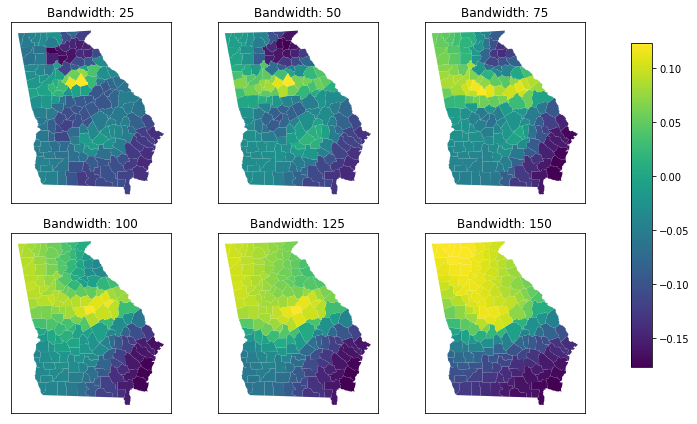

In [28]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))
bws = (x for x in range(25, 175, 25))

vmins = []
vmaxs = []

for row in range(2):
    for col in range(3):
        bw = next(bws)
        gwr_model = GWR(g_coords, g_y, g_X, bw)
        gwr_results = gwr_model.fit()
        georgia['rural'] = gwr_results.params[:, -1]
        georgia.plot('rural', ax = ax[row, col])
        ax[row,col].set_title('Bandwidth: ' + str(bw))
        ax[row,col].get_xaxis().set_visible(False)
        ax[row,col].get_yaxis().set_visible(False)
        vmins.append(georgia['rural'].min())
        vmaxs.append(georgia['rural'].max())

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(vmins), vmax=max(vmaxs)))
fig.tight_layout()
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=10)
plt.savefig('/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 09 - GWR and Satellite Classification/bandwith_exploration')
plt.show()

In [29]:
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,AreaKey,geometry,rural
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764,13001,"POLYGON ((931869.062 3545540.500, 934111.625 3...",-0.085605
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916,13003,"POLYGON ((867016.312 3482416.000, 884309.375 3...",-0.087206
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787,13005,"POLYGON ((914656.875 3512190.000, 924718.375 3...",-0.086593
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765,13007,"POLYGON ((744258.625 3480598.500, 765025.062 3...",-0.082666
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553,13009,"POLYGON ((832974.188 3677273.500, 834048.688 3...",-0.058372


## Probability models

Although in this lecture we focus on calibrating Gaussian GWR models for continuous
data, it is also possible to calibrate a Poisson GWR for count data or a Binomial logistic GWR for
boolean data. To do so, the appropriate family object should be imported from the spglm package:

In [0]:
from spglm.family import Poisson, Binomial

Then it is necessary to set `family = Poisson()` or `family = Binomial()` when instantiating a `Sel_BW` or
`GWR` object. Generally, it is not necessary to import or specify a Gaussian family object since it is the
default behavior across mgwr.

## Model Diagnosis

Once a GWR model calibration is complete, several diagnostic tools and statistics are available, that is:

* Model Fit
* Inference on Individual Parameter Estimates
* Inference on Surface of Parameter Estimates

### Model fit

Model fit can be assessed using the following global statistics:

* $AIC$: (Akaike Information Criterion): an estimator of out-of-sample prediction error
* $AICc$: A version of AIC for smaller sample sizes
* $pseudo R^2$: When analyzing data with a logistic regression, an equivalent statistic to R-squared does not exist.  The model estimates from a logistic regression are maximum likelihood estimates arrived at through an iterative process.  They are not calculated to minimize variance, so the OLS approach to goodness-of-fit does not apply.  However, to evaluate the goodness-of-fit of logistic models, several pseudo R-squareds have been developed.   These are “pseudo” R-squareds because they look like R-squared in the sense that they are on a similar scale, ranging from 0 to 1 (though some pseudo R-squareds never achieve 0 or 1) with higher values indicating better model fit, but they cannot be interpreted as one would interpret an OLS R-squared and different pseudo R-squareds can arrive at very different values.


All those metrics are
all available as attributes of the `GWRResults` object that is returned from a successful model calibration.
It is also possible to assess the fit of the model at each calibration location by mapping a local $R^2$
statistic. This local measure of fit provides an indication of how well the model fits over the smoothed
data, focused at each site.

#### Selecting the model

In [31]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

117.0


#### Calculating model fit metrics

This metrics calculate the overall model fit to our data.

In [32]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print("AIC metric is: ", gwr_results.aic)
print("AICc metric is: ", gwr_results.aicc)
print("pseudo r2 metric is: ", gwr_results.R2)

AIC metric is:  848.9154070534352
AICc metric is:  851.3502927844658
pseudo r2 metric is:  0.6780742669593463


#### Calculating local fit metrics

We can also, since our model takes into account the geographic space, map the local R2 variable (the others are not available locally).

In [33]:
gwr_results.localR2

array([[0.55932878],
       [0.5148705 ],
       [0.54751792],
       [0.50691577],
       [0.69062134],
       [0.69429812],
       [0.69813709],
       [0.70867337],
       [0.49985703],
       [0.49379842],
       [0.6959015 ],
       [0.59474509],
       [0.56569474],
       [0.47814882],
       [0.60674888],
       [0.61605313],
       [0.64680618],
       [0.70910987],
       [0.55605894],
       [0.57180314],
       [0.60626101],
       [0.72146014],
       [0.70582081],
       [0.55058988],
       [0.61502329],
       [0.68021077],
       [0.71061713],
       [0.70514392],
       [0.6934048 ],
       [0.58647709],
       [0.71281077],
       [0.51891817],
       [0.70963566],
       [0.51777485],
       [0.47111409],
       [0.66955054],
       [0.48475501],
       [0.72226804],
       [0.69969986],
       [0.53321737],
       [0.70852934],
       [0.7009096 ],
       [0.4910267 ],
       [0.70731059],
       [0.52509821],
       [0.58232445],
       [0.51456955],
       [0.715

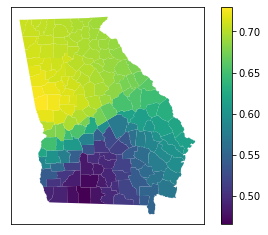

In [34]:
georgia['R2'] = gwr_results.localR2
georgia.plot('R2', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

This is extremely helpful because we can derive some conclusions from this. Our model is way better fitted at the northen side and worst at the Southwest

### Inference on individual parameter estimates

GWR is just an extension of the traditional regression framework, so traditional inferential tools are available.

The main control for the inference is the `filter_t`. Is a variation of the t-test method adapted for distance-weighting scheme cases. 

This helps to filter
parameters whose confidence intervals overlap with zero (i.e., statistically insignificant). Applying
the correction typically results in more conservative hypothesis tests that lead to the null hypothesis
$βˆ
i$ = 0 being accepted more often.

### Testing the statistical significance on a parameter

This examples shows how to use t-test filtered values to reveal statistical significance on the Foreign Born parameter.

The left plot is just the Foreign Born parameter across the dataset.

The right plot uses the correction of t-test to display the statistically significant results (not shaded gray).

The center plot uses the common alpha value of 0.05 for the confidence interval, this value does not correct for the multiple dependent hypothesis tests. 

⚠️ Warning,if you use 0.5 you will not be correcting for multiple dependent hypothesis tests, unless you know, leave it blank and you will be fine.

You can go ahead and change that confidence interval to whatever you see fit.

In [35]:
# Visualizing hypothesis tests for significance of parameter estimates
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

117.0


In [0]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()

In [0]:
# Default behavior using corrected alpha
filter_tc = gwr_results.filter_tvals()

In [0]:
# Without correction using common alpha
filter_t = gwr_results.filter_tvals(alpha = 0.05)
georgia['fb'] = gwr_results.params[:, 1]
georgia['fb_t'] = filter_t[:, 1]
georgia['fb_tc'] = filter_tc[:, 1]

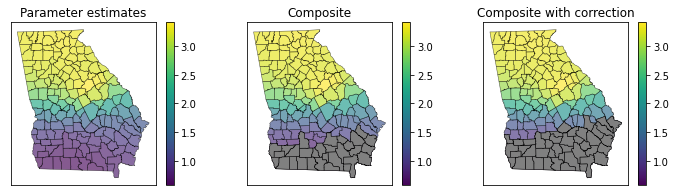

In [43]:
# Visualize
fig, ax = plt.subplots(1, 3, figsize = (12, 3))
georgia.plot('fb', 
             **{'edgecolor': 'black', 
                'alpha': .65, 
                'linewidth': .5}, 
             ax = ax[0], legend=True)

ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Parameter estimates')

georgia.plot('fb', 
             **{'edgecolor': 'black', 
                'alpha': .65, 
                'linewidth': .5}, 
             ax = ax[1], 
             legend=True)

georgia[filter_t[:, 1] == 0].plot(color = 'grey', 
                                  ax = ax[1], 
                                  **{'edgecolor': 'black',
                                     'linewidth': .5})

ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Composite')

georgia.plot('fb', 
             **{'edgecolor': 'black', 
                'alpha': .65, 
                'linewidth': .5},
             ax = ax[2], 
             legend=True)

georgia[filter_tc[:, 1] == 0].plot(color = 'grey', 
                                   ax = ax[2], 
                                   **{'edgecolor': 'black', 
                                      'linewidth': .5})
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('Composite with correction')

plt.show()

### Inference on surface parameter estimates

It is also possible to test the statistical significance of each surface of parameter estimates produced
by GWR via Monte Carlo methods. The spatial variability test shuffles the observations in space,
re-calibrates GWR on the randomized data while holding the model specification constant, and then
computes the variability of the resulting parameter estimates for each surface.

From this we get constructed pseudo p-values. A pseudo-p-value smaller than 0.05 indicates that the observed spatial variability of a coefficient
surface is significant at the 95% confidence level (i.e., non-random).

In [0]:
gwr_model = GWR(g_coords, g_y, g_X, 50)
gwr_results = gwr_model.fit()

⚠️⚠️ Be careful! Default iterations is 1000 but this can get computationally expensive

In [45]:
p_vals_100 = gwr_results.spatial_variability(gwr_selector, 100)
print(p_vals_100)

[0.12 0.03 0.04 0.14]


The four p-values
produced correspond to:
* parameter estimate surfaces for the intercept,
* the foreign born variable,
* the African American variable, 
* the rural variable

p-values above 0.05 shows that the parameter estimates surfaces exhibit no significant local variation. Values below 0.05 exhibit statistically significant local variation

### Local multicolinearity

As you might know, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data.

Though there are many tools available to evaluate multicollinearity amongst explanatory variables
for traditional regression models, some **extra care is needed for local models that borrow data from
nearby locations**. Within each local model, there may be higher levels of collinearity than is present in
the dataset as a whole. 

**Higher levels of collinearity** are associated with problems such as: 
* estimate
instability, 
* unintuitive parameter signs, 
* high R
2 diagnostics despite few or no significant parameters,
* inflated standard errors for parameter estimates

#### Diagnostic tools and rules of thumb

Diagnostic tools have
been designed to detect levels of local multicollinearity, including: 

* local correlation coefficients (LCC)
* local variation inflation factors (VIF)
* local condition number (CN)
* local variation decomposition
proportions (VDP) 

Each local measure has a rule of thumb that indicates that there might be an issue due to
multicollinearity:

* LCC higher than 0.8
* VIF higher than 10
* CN higher than 30
* VDP higher than 0.5

However, these rules are not absolute and
obtaining lower values does not mean collinearity is innocuous, nor does obtaining larger values
guarantee collinearity is indeed problematic. 

In the example below VDP’s indicate that some areas may be subject to the effects of collinearity; however, none of the CC’s, VIF’s nor CN’s indicate that collinearity is problematic for any of the
calibration locations.

In [46]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

117.0


In [0]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()

In [48]:
print(gwr_model)

In [0]:
LCC, VIF, CN, VDP = gwr_results.local_collinearity()

#### Visualization

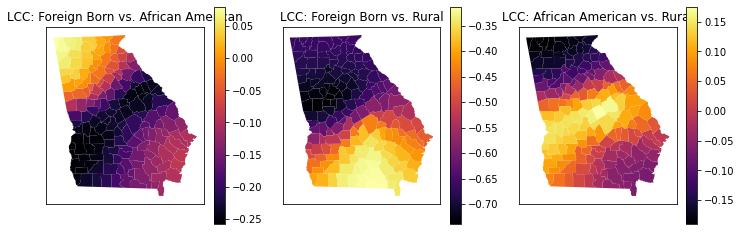

In [51]:
names = ['Foreign Born vs. African American',
'Foreign Born vs. Rural',
'African American vs. Rural']

fig, ax = plt.subplots(1, 3, figsize = (12, 4))

for col in range(3):
    georgia['vif'] = LCC[:, col]
    georgia.plot('vif', ax = ax[col], legend = True, cmap='inferno')
    ax[col].set_title('LCC: ' + names[col])
    ax[col].get_xaxis().set_visible(False)
    ax[col].get_yaxis().set_visible(False)

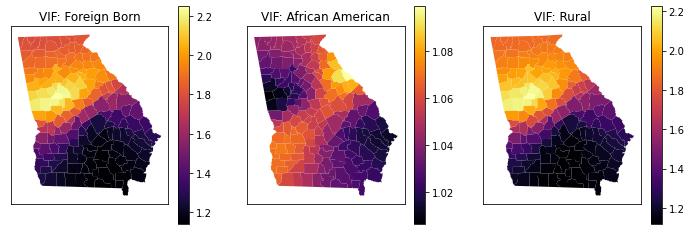

In [52]:
names = ['Foreign Born', 'African American', 'Rural']

fig, ax = plt.subplots(1, 3, figsize = (12, 4))

for col in range(3):
    georgia['vif'] = VIF[:, col]
    georgia.plot('vif', ax = ax[col], legend = True, cmap='inferno')
    ax[col].set_title('VIF: ' + names[col])
    ax[col].get_xaxis().set_visible(False)
    ax[col].get_yaxis().set_visible(False)

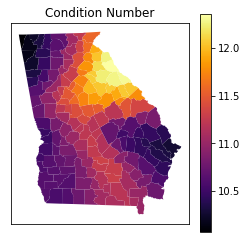

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
georgia['cn'] = CN
georgia.plot('cn', legend = True, ax = ax, cmap='inferno')
ax.set_title('Condition Number')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [0]:
names = ['Intercept', 'Foreign Born', 'African American', 'Rural']

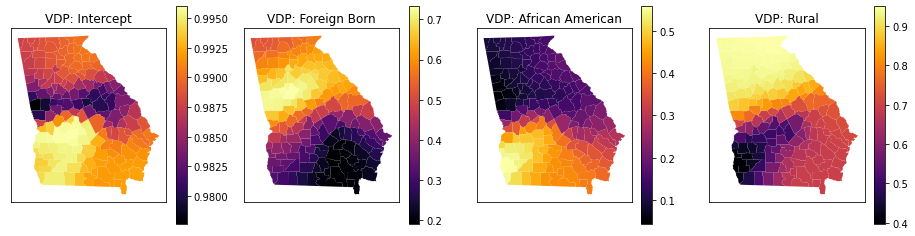

In [55]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

for col in range(4):
    georgia['vdp'] = VDP[:, col]
    georgia.plot('vdp', ax = ax[col], legend = True, cmap='inferno')
    ax[col].set_title('VDP: ' + names[col])
    ax[col].get_xaxis().set_visible(False)
    ax[col].get_yaxis().set_visible(False)

## Out-of-sample spatial prediction

Though the primary focus of mgwr is on inference, it is also possible to use GWR as a tool for
out-of-sample spatial prediction in a manner similar to interpolation methods.

For example,
it is feasible to first calibrate a GWR model using data where both the dependent and independent
variables are observed in order to obtain an AIC optimized bandwidth. Out-of-sample predictions are
then obtained by borrowing exogenous data at the unobserved locations from surrounding sites based
on the the previously estimated bandwidth, estimating the parameters for the prediction site, and then
calculating predicted values of the dependent variable using the borrowed explanatory covariates and
estimates. This is demonstrated below by splitting the Georgia dataset into a calibration dataset for
obtaining a bandwidth and holding out some observations to then predict.

### Split into calibration and prediction sets

What the heck ["tilde"](https://medium.com/@kevingxyz/dont-look-so-listless-it-s-python-list-part-2-tilde-operator-685a2a880e4b) operator does?

In [0]:
np.random.seed(908)
sample = np.random.choice(range(159), 10)
mask = np.ones_like(g_y, dtype = bool).flatten()
mask[sample] = False

cal_coords = np.array(g_coords)[mask]
cal_y = g_y[mask]
cal_X = g_X[mask]

pred_coords = np.array(g_coords)[~mask]
pred_y = g_y[~mask]
pred_X = g_X[~mask]

In [577]:
pred_coords

array([[ 803747.1, 3769623. ],
       [1059706. , 3556747. ],
       [ 703495.1, 3467152. ],
       [ 662257.4, 3789664. ],
       [ 873518.8, 3689861. ],
       [ 970465.7, 3640263. ],
       [ 732876.8, 3584393. ],
       [ 700833.7, 3598228. ],
       [ 793263.9, 3719734. ],
       [ 884376.9, 3717493. ]])

In [583]:
pred_X

array([[-0.17131773, -0.92067772, -0.20655474],
       [ 0.7455919 ,  0.61329635, -2.40911467],
       [-0.72308636,  0.9636057 , -0.64336495],
       [-0.03337557, -0.79832915, -1.26156244],
       [-0.69874362,  3.01525274,  1.10387586],
       [-0.74742909,  0.8147098 , -0.60634713],
       [-0.56891571,  0.8037446 ,  1.10387586],
       [ 1.84101491,  0.60925654, -2.47944851],
       [-0.28491715, -0.29104427,  0.21544833],
       [-0.28491715,  1.96028487,  1.10387586]])

### Calibration of GWR model

In [0]:
gwr_selector = Sel_BW(cal_coords, cal_y, cal_X)
gwr_bw = gwr_selector.search(bw_min = 2)

In [579]:
print(gwr_bw)

109.0


In [0]:
model = GWR(cal_coords, cal_y, cal_X, gwr_bw)
gwr_results = model.fit()

### Make predictions

In [0]:
pred_results = model.predict(pred_coords, pred_X)

### Check correlation between known and predicted values

In [582]:
corr = np.corrcoef(pred_results.predictions.flatten(),
pred_y.flatten())[0][1]
print(corr)

0.9142492684278588


## Saving models using pickle


In [0]:
pkl_file = 'my_gwr_model.pickle'

In [0]:
import pickle

with open(pkl_file, 'wb') as f:
    pickle.dump(model, f)

In [0]:
with open(pkl_file, 'rb') as loaded_pkl:
    loaded_model = pickle.load(loaded_pkl)

In [163]:
model.predict(pred_coords, pred_X)

In [0]:
r = loaded_model.predict(pred_coords, pred_X)

In [165]:
r.predictions

array([[12.17204646],
       [17.23453734],
       [10.77131683],
       [13.70057966],
       [ 4.29466558],
       [ 9.54432956],
       [ 7.57597975],
       [20.24941349],
       [10.82796502],
       [ 7.10512614]])

---

---


# GWR applied to the BCN dataset [EXERCISE]

This shows how to apply such models to your own dataset. However, the ETL process is biased on purpose. There are few problems being passed to the model, like not taking into account whether if the CRS is projected or not. Could you fix those? Also, you could try to automatize the whole ETL so that it doesn't need to be so hand crafted.

Try the following:

* Different model fits (kernels, activations)
* Doing thorough model diagnosis to understand spatial relations
* Do a prediction with fake data

## ETL

In [0]:
hospitals_csv = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/bcn_hospitals.csv'
education_csv = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/bcn_education.csv'
housing_price_csv = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/bcn_housing_price.csv'
security_csv = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/bcn_crime.csv'
trees_csv = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/bcn_trees.csv'

In [0]:
bcn_barrios_geojson = 'https://raw.githubusercontent.com/vfp1/bts-advanced-data-analysis-2020/master/S09_GeoSpatial/Barcelona_neighbourhoods.geojson'

In [0]:
hospitals = pd.read_csv(filepath_or_buffer=hospitals_csv)
education = pd.read_csv(filepath_or_buffer=education_csv)
housing = pd.read_csv(filepath_or_buffer=housing_price_csv)
security = pd.read_csv(filepath_or_buffer=security_csv)
trees = pd.read_csv(filepath_or_buffer=trees_csv)

In [0]:
bcn_barrios = gpd.read_file(bcn_barrios_geojson)

In [0]:
hospitals = hospitals.drop(columns=['Unnamed: 0'])

In [0]:
education = education.drop(columns=['Unnamed: 0'])

In [0]:
housing = housing.drop(columns=['Unnamed: 0'])

In [0]:
security = security.drop(columns=['Unnamed: 0'])

In [118]:
hospitals.head()

,Neighbourhood,Hosp_Count,LATITUD,LONGITUD
0,Sant Gervasi - Galvany,8,41.401136,2.141224
1,la Salut,6,41.408839,2.149860
2,les Tres Torres,5,41.397669,2.129943
3,la Marina de Port,5,41.358293,2.144328
4,Vallcarca i els Penitents,5,41.414037,2.142642


In [119]:
education.head()

,Neighborhood,Neighborhood_ID,school_by_population,LATITUD,LONGITUD
0,el Raval,1.0,0.003484,41.379733,2.164073
1,el Barri Gòtic,2.0,0.006131,41.379188,2.179645
2,la Barceloneta,3.0,0.008713,41.385576,2.194025
3,"Sant Pere, Santa Caterina i la Ribera",4.0,0.006507,41.387252,2.175480
4,el Fort Pienc,5.0,0.002614,41.398772,2.185167


In [120]:
housing.head()

,Neighborhood,Neighborhood_ID,Price,LATITUD,LONGITUD
0,1.0,el Raval,14.0175,41.379733,2.164073
1,2.0,el Barri Gòtic,13.7725,41.379188,2.179645
2,3.0,la Barceloneta,16.9175,41.385576,2.194025
3,4.0,"Sant Pere, Santa Caterina i la Ribera",15.0225,41.387252,2.175480
4,5.0,el Fort Pienc,13.1425,41.398772,2.185167


In [121]:
security.head()

,Neighborhood,Neighborhood_ID,ratio_incidents,LATITUD,LONGITUD
0,el Raval,1.0,0.578214,41.379733,2.164073
1,el Barri Gòtic,2.0,1.139621,41.379188,2.179645
2,la Barceloneta,3.0,0.604383,41.385576,2.194025
3,"Sant Pere, Santa Caterina i la Ribera",4.0,0.540859,41.387252,2.175480
4,el Fort Pienc,5.0,0.261512,41.398772,2.185167


In [122]:
trees.head()

,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,NOM_CIENTIFIC,NOM_CASTELLA,NOM_CATALA,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL
0,0000022AR,430319.118,4587765.810,41.438442,2.165919,ARBRE VIARI,"Can Ensenya, C.V. (Fabra i Puig 439, Villalba ...","Pg Fabra i Puig, 468",NaN,1104,Celtis australis,Almez,Lledoner,NaN,NaN,NaN,NaN,MÀNEGA,GESPA,PARTERRE,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
1,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,Populus nigra 'Italica',Chopo lombardo,Pollancre gavatx,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
2,0000028AR,430277.559,4587643.344,41.437335,2.165436,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",PETITA,152,Populus nigra 'Italica',Chopo lombardo,Pollancre gavatx,PRIMERA,NaN,09/05/2017,NaN,GOTEIG AVARIAT,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,ALTRES
3,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,Platanus x hispanica,Plátano,Plàtan,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA
4,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",MITJANA,126,Platanus x hispanica,Plátano,Plàtan,SEGONA,NaN,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL TRIANGULAR,SENSE COBERTURA,major que o igual a 100 cm,VORA METÀL·LICA


In [123]:
bcn_barrios.head()

,neighbourhood,neighbourhood_group,geometry
0,el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,la Dreta de l'Eixample,Eixample,"MULTIPOLYGON (((2.17093 41.40185, 2.17333 41.4..."
3,l'Antiga Esquerra de l'Eixample,Eixample,"MULTIPOLYGON (((2.15972 41.38301, 2.15859 41.3..."
4,la Nova Esquerra de l'Eixample,Eixample,"MULTIPOLYGON (((2.14999 41.37562, 2.14983 41.3..."


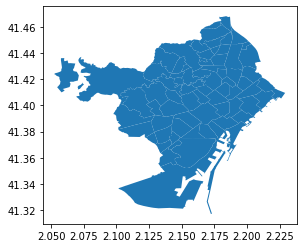

In [124]:
bcn_barrios.plot()

In [182]:
bcn_barrios.shape

(75, 3)

### Transform CSV to GPD

In [0]:
hospitals_gdf = gpd.GeoDataFrame(hospitals, geometry=gpd.points_from_xy(hospitals.LONGITUD, hospitals.LATITUD))
education_gdf = gpd.GeoDataFrame(education, geometry=gpd.points_from_xy(education.LONGITUD, education.LATITUD))
housing_gdf = gpd.GeoDataFrame(housing, geometry=gpd.points_from_xy(housing.LONGITUD, housing.LATITUD))
security_gdf = gpd.GeoDataFrame(security, geometry=gpd.points_from_xy(security.LONGITUD, security.LATITUD))
trees_gdf = gpd.GeoDataFrame(trees, geometry=gpd.points_from_xy(trees.LONGITUD_WGS84, trees.LATITUD_WGS84))

In [230]:
hospitals_gdf.crs = {'init' :'epsg:4326'}
education_gdf.crs = {'init' :'epsg:4326'}
housing_gdf.crs = {'init' :'epsg:4326'}
security_gdf.crs = {'init' :'epsg:4326'}
trees_gdf.crs = {'init' :'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


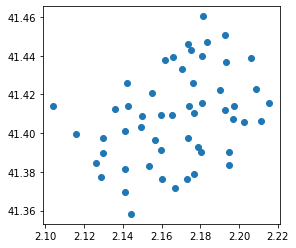

In [127]:
hospitals_gdf.plot()

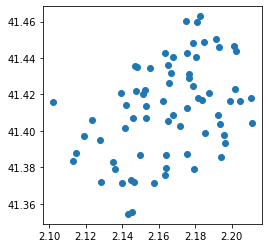

In [128]:
education_gdf.plot()

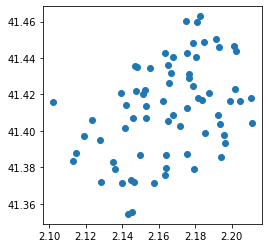

In [129]:
housing_gdf.plot()

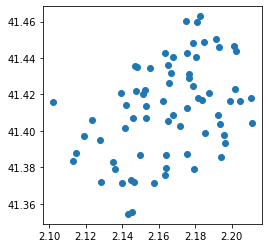

In [130]:
security_gdf.plot()

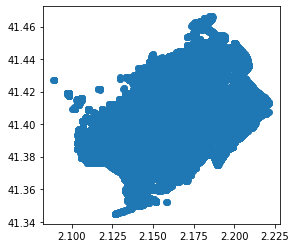

In [131]:
trees_gdf.plot()

### Trees GDF

In [0]:
import rtree

In [133]:
barrios_and_trees = gpd.sjoin(left_df=trees_gdf, right_df=bcn_barrios, how='right')

/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4326 +type=crs != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [134]:
barrios_and_trees.tail()

,index_left,CODI,X_ETRS89,Y_ETRS89,LATITUD_WGS84,LONGITUD_WGS84,TIPUS_ELEMENT,ESPAI_VERD,ADRECA,ALCADA,CAT_ESPECIE_ID,NOM_CIENTIFIC,NOM_CASTELLA,NOM_CATALA,CATEGORIA_ARBRAT,AMPLADA_VORERA,DATA_PLANTACIO,TIPUS_AIGUA,TIPUS_REG,TIPUS_SUPERFICIE,TIPUS_SUPORT,COBERTURA_ESCOCELL,MIDA_ESCOCELL,VORA_ESCOCELL,neighbourhood,neighbourhood_group,geometry
72,12039.0,0036569AR,433118.902,4586164.669,41.424259,2.199607,ARBRE VIARI,NaN,"C\ Puigcerdà, 303",PETITA,1104.0,Celtis australis,Almez,Lledoner,SEGONA,9.0,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,ENTRE 60 I 100 cm,VORA FORMIGÓ,la Verneda i la Pau,Sant Martí,"MULTIPOLYGON (((2.20746 41.42504, 2.20779 41.4..."
72,11898.0,0036417AR,433112.323,4586165.568,41.424267,2.199528,ARBRE VIARI,NaN,"C\ Cantàbria, 72",EXEMPLAR,126.0,Platanus x hispanica,Plátano,Plàtan,TERCERA,30.0,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL RECTANGULAR,SENSE COBERTURA,major que o igual a 100 cm,SENSE VORA,la Verneda i la Pau,Sant Martí,"MULTIPOLYGON (((2.20746 41.42504, 2.20779 41.4..."
72,9973.0,0033366AR,433127.782,4586166.408,41.424275,2.199713,PALMERA VIARI,NaN,"C\ Puigcerdà, 303",MITJANA,48.0,Phoenix dactylifera,Palmera datilera,Palmera datilera; palmera de dàtils,SEGONA,0.0,NaN,NaN,SENSE INFORMAR,PAVIMENT,ESCOCELL QUADRAT,SENSE COBERTURA,major que o igual a 100 cm,VORA FORMIGÓ,la Verneda i la Pau,Sant Martí,"MULTIPOLYGON (((2.20746 41.42504, 2.20779 41.4..."
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Vallvidrera, el Tibidabo i les Planes",Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07522 41.41605, 2.07520 41.4..."
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Vallvidrera, el Tibidabo i les Planes",Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07052 41.41907, 2.07050 41.4..."


In [0]:
barrios_and_trees = barrios_and_trees.drop(columns=['index_left', 'CODI', 'X_ETRS89', 'Y_ETRS89', 'LATITUD_WGS84', 'LONGITUD_WGS84'])

In [136]:
barrios_and_trees['TIPUS_ELEMENT'].count()

157027

In [0]:
bt_grouped = barrios_and_trees.groupby(['neighbourhood', 'neighbourhood_group']).count()

In [0]:
bt_grouped = bt_grouped.drop(columns=['ADRECA', 'ALCADA',	'CAT_ESPECIE_ID','NOM_CIENTIFIC','NOM_CASTELLA', 'NOM_CATALA', 'CATEGORIA_ARBRAT', 'AMPLADA_VORERA','DATA_PLANTACIO','TIPUS_AIGUA',	'TIPUS_REG', 'TIPUS_SUPERFICIE', 'TIPUS_SUPORT', 'COBERTURA_ESCOCELL', 'MIDA_ESCOCELL', 'VORA_ESCOCELL', 'geometry'])

In [139]:
bt_grouped.reset_index(level=0, inplace=True)
bt_grouped.head()

,neighbourhood,TIPUS_ELEMENT,ESPAI_VERD
neighbourhood_group,,,
Sant Andreu,Baró de Viver,761,151
Horta-Guinardó,Can Baró,437,10
Nou Barris,Can Peguera,435,87
Nou Barris,Canyelles,764,376
Nou Barris,Ciutat Meridiana,170,77


In [0]:
bt_grouped_geom = pd.merge(bt_grouped, bcn_barrios, left_on=bt_grouped.neighbourhood, right_on=bcn_barrios.neighbourhood)

In [141]:
bt_grouped_geom

,key_0,neighbourhood_x,TIPUS_ELEMENT,ESPAI_VERD,neighbourhood_y,neighbourhood_group,geometry
0,Baró de Viver,Baró de Viver,761,151,Baró de Viver,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4..."
1,Can Baró,Can Baró,437,10,Can Baró,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4..."
2,Can Peguera,Can Peguera,435,87,Can Peguera,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4..."
3,Canyelles,Canyelles,764,376,Canyelles,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4..."
4,Ciutat Meridiana,Ciutat Meridiana,170,77,Ciutat Meridiana,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4..."
...,...,...,...,...,...,...,...
70,la Vila Olímpica del Poblenou,la Vila Olímpica del Poblenou,2804,590,la Vila Olímpica del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3..."
71,la Vila de Gràcia,la Vila de Gràcia,2603,306,la Vila de Gràcia,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4..."
72,les Corts,les Corts,5349,1040,les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3..."
73,les Roquetes,les Roquetes,1194,140,les Roquetes,Nou Barris,"MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4..."


In [0]:
bt_grouped_geom = bt_grouped_geom.drop(columns=['key_0', 'neighbourhood_x'])

In [0]:
bt_grouped_gdf = gpd.GeoDataFrame(bt_grouped_geom, geometry=bt_grouped_geom.geometry)

In [144]:
bt_grouped_geom.head()

,TIPUS_ELEMENT,ESPAI_VERD,neighbourhood_y,neighbourhood_group,geometry
0,761,151,Baró de Viver,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4..."
1,437,10,Can Baró,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4..."
2,435,87,Can Peguera,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4..."
3,764,376,Canyelles,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4..."
4,170,77,Ciutat Meridiana,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4..."


In [0]:
bt_grouped_geom['polygons'] = bt_grouped_geom.geometry

Text(0.5, 1.0, 'Tree counting per neighbourhood')

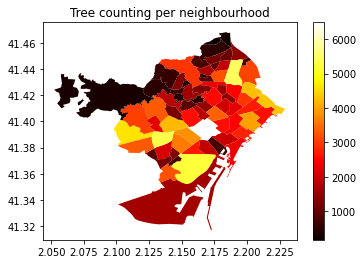

In [337]:
import matplotlib.pyplot as plt
bt_grouped_gdf.plot(column='TIPUS_ELEMENT', cmap='hot', legend=True)
plt.title('Tree counting per neighbourhood')

Text(0.5, 1.0, 'Green Spaces per neighbourhood')

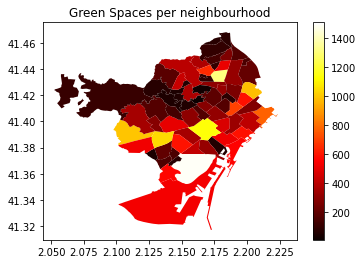

In [338]:
bt_grouped_gdf.plot(column='ESPAI_VERD', cmap='hot', legend=True)
plt.title('Green Spaces per neighbourhood')

In [339]:
bt_grouped_gdf.shape

(75, 6)

In [352]:
bt_grouped_gdf

,TIPUS_ELEMENT,ESPAI_VERD,neighbourhood_y,neighbourhood_group,geometry,polygons
0,761,151,Baró de Viver,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4..."
1,437,10,Can Baró,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4..."
2,435,87,Can Peguera,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4..."
3,764,376,Canyelles,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4..."
4,170,77,Ciutat Meridiana,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4..."
...,...,...,...,...,...,...
70,2804,590,la Vila Olímpica del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3..."
71,2603,306,la Vila de Gràcia,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...","MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4..."
72,5349,1040,les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3...","MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3..."
73,1194,140,les Roquetes,Nou Barris,"MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4...","MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4..."


### Hospitals gdf

In [340]:
hospitals_gdf.head()

,Hosp_Count,neighbourhood_y,neighbourhood_group_y,geometry
0,8,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.14671 41.40172, 2.14763 41.4..."
1,6,la Salut,Gràcia,"MULTIPOLYGON (((2.15211 41.41624, 2.15221 41.4..."
2,5,les Tres Torres,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.13290 41.39787, 2.13288 41.3..."
3,5,la Marina de Port,Sants-Montjuïc,"MULTIPOLYGON (((2.14013 41.36730, 2.13960 41.3..."
4,5,Vallcarca i els Penitents,Gràcia,"MULTIPOLYGON (((2.13621 41.42369, 2.13643 41.4..."


In [341]:
hospitals_gdf.shape

(51, 4)

In [0]:
hospitals_geom = pd.merge(hospitals_gdf, bcn_barrios, left_on=hospitals_gdf.neighbourhood_y, right_on=bcn_barrios.neighbourhood_y)

In [0]:
hospitals_geom = hospitals_geom.drop_duplicates(subset='neighbourhood_y', keep='first')

In [350]:
hospitals_geom

,Hosp_Count,neighbourhood_y,neighbourhood_group_y,geometry
0,8,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.14671 41.40172, 2.14763 41.4..."
1,6,la Salut,Gràcia,"MULTIPOLYGON (((2.15211 41.41624, 2.15221 41.4..."
2,5,les Tres Torres,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.13290 41.39787, 2.13288 41.3..."
3,5,la Marina de Port,Sants-Montjuïc,"MULTIPOLYGON (((2.14013 41.36730, 2.13960 41.3..."
4,5,Vallcarca i els Penitents,Gràcia,"MULTIPOLYGON (((2.13621 41.42369, 2.13643 41.4..."
5,5,Sant Gervasi - la Bonanova,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.12892 41.41990, 2.12902 41.4..."
6,5,Sarrià,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.11700 41.41353, 2.11715 41.4..."
7,5,Sant Andreu,Sant Andreu,"MULTIPOLYGON (((2.19579 41.44760, 2.19624 41.4..."
8,4,les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3..."
9,4,Montbau,Horta-Guinardó,"MULTIPOLYGON (((2.13629 41.44277, 2.13631 41.4..."


In [0]:
hospitals_geom = hospitals_geom.drop(columns=['geometry_x'])

In [0]:
hospitals_gdf = gpd.GeoDataFrame(hospitals_geom, geometry=hospitals_geom.geometry)

Text(0.5, 1.0, 'Hospitals per neighbourhood')

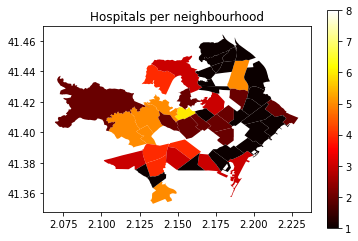

In [347]:
import matplotlib.pyplot as plt
hospitals_gdf.plot(column='Hosp_Count', cmap='hot', legend=True)
plt.title('Hospitals per neighbourhood')

In [351]:
hospitals_gdf.shape

(51, 4)

### House prices GDF

In [0]:
housing_prices_geom = pd.merge(housing_gdf, bcn_barrios, left_on=housing_gdf.Neighborhood_ID, right_on=bcn_barrios.neighbourhood)

In [251]:
housing_prices_geom.head()

,key_0,Unnamed: 0,Neighborhood,Neighborhood_ID,Price,LATITUD,LONGITUD,geometry_x,neighbourhood,neighbourhood_group,geometry_y
0,el Raval,0,1.0,el Raval,14.0175,41.379733,2.164073,POINT (2.16407 41.37973),el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,el Barri Gòtic,1,2.0,el Barri Gòtic,13.7725,41.379188,2.179645,POINT (2.17965 41.37919),el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,la Barceloneta,2,3.0,la Barceloneta,16.9175,41.385576,2.194025,POINT (2.19402 41.38558),la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,"Sant Pere, Santa Caterina i la Ribera",3,4.0,"Sant Pere, Santa Caterina i la Ribera",15.0225,41.387252,2.175480,POINT (2.17548 41.38725),"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,el Fort Pienc,4,5.0,el Fort Pienc,13.1425,41.398772,2.185167,POINT (2.18517 41.39877),el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."


In [0]:
housing_prices_geom = housing_prices_geom.drop(columns=['key_0', 'Neighborhood', 'Neighborhood_ID', 'LATITUD', 'LONGITUD', 'geometry_x'])

In [0]:
housing_prices_geom = housing_prices_geom.drop_duplicates(subset='neighbourhood', keep='first')

In [0]:
housing_prices_gdf = gpd.GeoDataFrame(housing_prices_geom, geometry=housing_prices_geom.geometry_y)

In [0]:
housing_prices_gdf['Price'] = housing_prices_gdf['Price']*10000

Text(0.5, 1.0, 'Average house price per neighbourhood')

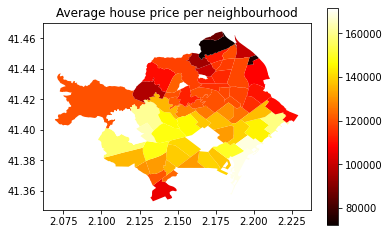

In [258]:
import matplotlib.pyplot as plt
housing_prices_gdf.plot(column='Price', cmap='hot', legend=True)
plt.title('Average house price per neighbourhood')

In [259]:
housing_prices_gdf.shape

(70, 6)

### Education GDF

In [0]:
education_geom = pd.merge(education_gdf, bcn_barrios, left_on=education_gdf.Neighborhood, right_on=bcn_barrios.neighbourhood)

In [261]:
education_geom.head()

,key_0,Unnamed: 0,Neighborhood,Neighborhood_ID,school_by_population,LATITUD,LONGITUD,geometry_x,neighbourhood,neighbourhood_group,geometry_y
0,el Raval,0,el Raval,1.0,0.003484,41.379733,2.164073,POINT (2.16407 41.37973),el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,el Barri Gòtic,1,el Barri Gòtic,2.0,0.006131,41.379188,2.179645,POINT (2.17965 41.37919),el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,la Barceloneta,2,la Barceloneta,3.0,0.008713,41.385576,2.194025,POINT (2.19402 41.38558),la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,"Sant Pere, Santa Caterina i la Ribera",3,"Sant Pere, Santa Caterina i la Ribera",4.0,0.006507,41.387252,2.175480,POINT (2.17548 41.38725),"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,el Fort Pienc,4,el Fort Pienc,5.0,0.002614,41.398772,2.185167,POINT (2.18517 41.39877),el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."


In [0]:
education_geom = education_geom.drop(columns=['key_0', 'Unnamed: 0','Neighborhood', 'Neighborhood_ID', 'LATITUD', 'LONGITUD', 'geometry_x'])

In [0]:
education_geom = education_geom.drop_duplicates(subset='neighbourhood', keep='first')

In [0]:
education_join_gdf = gpd.GeoDataFrame(education_geom, geometry=education_geom.geometry_y)

Text(0.5, 1.0, 'School per capita')

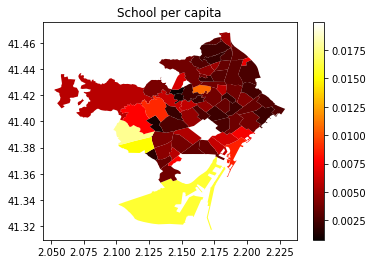

In [188]:
import matplotlib.pyplot as plt
education_join_gdf.plot(column='school_by_population', cmap='hot', legend=True)
plt.title('School per capita')

In [189]:
education_join_gdf.shape

(72, 5)

### Crime GDF

In [267]:
security_gdf.head()

,Unnamed: 0,Neighborhood,Neighborhood_ID,ratio_incidents,LATITUD,LONGITUD,geometry
0,0,el Raval,1.0,0.578214,41.379733,2.164073,POINT (2.16407 41.37973)
1,1,el Barri Gòtic,2.0,1.139621,41.379188,2.179645,POINT (2.17965 41.37919)
2,2,la Barceloneta,3.0,0.604383,41.385576,2.194025,POINT (2.19402 41.38558)
3,3,"Sant Pere, Santa Caterina i la Ribera",4.0,0.540859,41.387252,2.175480,POINT (2.17548 41.38725)
4,4,el Fort Pienc,5.0,0.261512,41.398772,2.185167,POINT (2.18517 41.39877)


In [0]:
security_geom = pd.merge(security_gdf, bcn_barrios, left_on=education_gdf.Neighborhood, right_on=bcn_barrios.neighbourhood)

In [269]:
security_geom.head()

,key_0,Unnamed: 0,Neighborhood,Neighborhood_ID,ratio_incidents,LATITUD,LONGITUD,geometry_x,neighbourhood,neighbourhood_group,geometry_y
0,el Raval,0,el Raval,1.0,0.578214,41.379733,2.164073,POINT (2.16407 41.37973),el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,el Barri Gòtic,1,el Barri Gòtic,2.0,1.139621,41.379188,2.179645,POINT (2.17965 41.37919),el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,la Barceloneta,2,la Barceloneta,3.0,0.604383,41.385576,2.194025,POINT (2.19402 41.38558),la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,"Sant Pere, Santa Caterina i la Ribera",3,"Sant Pere, Santa Caterina i la Ribera",4.0,0.540859,41.387252,2.175480,POINT (2.17548 41.38725),"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,el Fort Pienc,4,el Fort Pienc,5.0,0.261512,41.398772,2.185167,POINT (2.18517 41.39877),el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."


In [0]:
security_geom = security_geom.drop(columns=['key_0', 'Neighborhood', 'Neighborhood_ID', 'LATITUD', 'LONGITUD', 'geometry_x'])

In [0]:
security_geom = security_geom.drop_duplicates(subset='neighbourhood', keep='first')

In [0]:
security_geom_gdf = gpd.GeoDataFrame(security_geom, geometry=security_geom.geometry_y)

Text(0.5, 1.0, 'Crime suffered per capita')

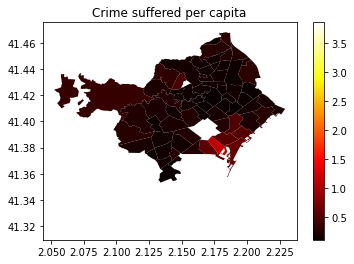

In [195]:
import matplotlib.pyplot as plt
security_geom.plot(column='ratio_incidents', cmap='hot', legend=True)
plt.title('Crime suffered per capita')

In [274]:
security_geom.shape

(70, 6)

### Merge all GDFs

In [0]:
trees_copy = bt_grouped_gdf.copy()
price_copy = housing_prices_gdf.copy()
hospitals_copy = hospitals_gdf.copy()
education_copy = education_join_gdf.copy()
crime_copy = security_geom.copy()

In [0]:
trees_copy = trees_copy.rename(columns={'neighbourhood_y':'barri'})

In [0]:
price_copy = price_copy.rename(columns={'neighbourhood':'barri'})

In [0]:
hospitals_copy = hospitals_copy.rename(columns={'neighbourhood_y':'barri'})

In [0]:
education_copy = education_copy.rename(columns={'neighbourhood':'barri'})

In [0]:
crime_copy = crime_copy.rename(columns={'neighbourhood':'barri'})

In [359]:
trees_copy

,TIPUS_ELEMENT,ESPAI_VERD,barri,neighbourhood_group,geometry,polygons
0,761,151,Baró de Viver,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4..."
1,437,10,Can Baró,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4..."
2,435,87,Can Peguera,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4..."
3,764,376,Canyelles,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4..."
4,170,77,Ciutat Meridiana,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4..."
...,...,...,...,...,...,...
70,2804,590,la Vila Olímpica del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3..."
71,2603,306,la Vila de Gràcia,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...","MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4..."
72,5349,1040,les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3...","MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3..."
73,1194,140,les Roquetes,Nou Barris,"MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4...","MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4..."


In [360]:
price_copy

,Unnamed: 0,Price,barri,neighbourhood_group,geometry_y,geometry
0,0,140175.0,el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3...","MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,1,137725.0,el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3...","MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,2,169175.0,la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3...","MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,3,150225.0,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3...","MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,4,131425.0,el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4...","MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."
...,...,...,...,...,...,...
67,68,159275.0,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,"MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4...","MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4..."
68,69,109600.0,el Besòs i el Maresme,Sant Martí,"MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4...","MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4..."
69,70,136575.0,Provençals del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4...","MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4..."
70,71,115225.0,Sant Martí de Provençals,Sant Martí,"MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4...","MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4..."


In [361]:
hospitals_copy

,Hosp_Count,barri,neighbourhood_group_y,geometry
0,8,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.14671 41.40172, 2.14763 41.4..."
1,6,la Salut,Gràcia,"MULTIPOLYGON (((2.15211 41.41624, 2.15221 41.4..."
2,5,les Tres Torres,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.13290 41.39787, 2.13288 41.3..."
3,5,la Marina de Port,Sants-Montjuïc,"MULTIPOLYGON (((2.14013 41.36730, 2.13960 41.3..."
4,5,Vallcarca i els Penitents,Gràcia,"MULTIPOLYGON (((2.13621 41.42369, 2.13643 41.4..."
5,5,Sant Gervasi - la Bonanova,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.12892 41.41990, 2.12902 41.4..."
6,5,Sarrià,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.11700 41.41353, 2.11715 41.4..."
7,5,Sant Andreu,Sant Andreu,"MULTIPOLYGON (((2.19579 41.44760, 2.19624 41.4..."
8,4,les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3..."
9,4,Montbau,Horta-Guinardó,"MULTIPOLYGON (((2.13629 41.44277, 2.13631 41.4..."


In [362]:
education_copy

,school_by_population,barri,neighbourhood_group,geometry_y,geometry
0,0.003484,el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3...","MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,0.006131,el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3...","MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,0.008713,la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3...","MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,0.006507,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3...","MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,0.002614,el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4...","MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."
...,...,...,...,...,...
67,0.002223,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,"MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4...","MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4..."
68,0.002886,el Besòs i el Maresme,Sant Martí,"MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4...","MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4..."
69,0.003431,Provençals del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4...","MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4..."
70,0.004293,Sant Martí de Provençals,Sant Martí,"MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4...","MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4..."


In [363]:
crime_copy

,Unnamed: 0,ratio_incidents,barri,neighbourhood_group,geometry_y,geometry
0,0,0.578214,el Raval,Ciutat Vella,"MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3...","MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3..."
1,1,1.139621,el Barri Gòtic,Ciutat Vella,"MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3...","MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3..."
2,2,0.604383,la Barceloneta,Ciutat Vella,"MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3...","MULTIPOLYGON (((2.19644 41.38354, 2.19544 41.3..."
3,3,0.540859,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,"MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3...","MULTIPOLYGON (((2.18348 41.39064, 2.18462 41.3..."
4,4,0.261512,el Fort Pienc,Eixample,"MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4...","MULTIPOLYGON (((2.18596 41.40247, 2.18656 41.4..."
...,...,...,...,...,...,...
67,68,0.271180,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,"MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4...","MULTIPOLYGON (((2.21345 41.41067, 2.21415 41.4..."
68,69,0.191926,el Besòs i el Maresme,Sant Martí,"MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4...","MULTIPOLYGON (((2.22327 41.41202, 2.22586 41.4..."
69,70,0.172689,Provençals del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4...","MULTIPOLYGON (((2.19570 41.40552, 2.19380 41.4..."
70,71,0.108707,Sant Martí de Provençals,Sant Martí,"MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4...","MULTIPOLYGON (((2.19822 41.41192, 2.19710 41.4..."


#### Use reduce and lambda to merge all together

In [0]:
gdfs_list = [trees_copy, price_copy, hospitals_copy, education_copy, crime_copy]

In [0]:
from functools import reduce

df_merged = reduce(lambda  left, right: pd.merge(left, right, how='outer', on='barri'), gdfs_list)

In [366]:
len(df_merged['geometry'])

75

In [367]:
df_merged

,TIPUS_ELEMENT,ESPAI_VERD,barri,neighbourhood_group_x,geometry_x,polygons,Unnamed: 0_x,Price,neighbourhood_group_y_x,geometry_y_x,geometry_y_x,Hosp_Count,neighbourhood_group_y_y,geometry_x,school_by_population,neighbourhood_group_x,geometry_y_y,geometry_y_x,Unnamed: 0_y,ratio_incidents,neighbourhood_group_y,geometry_y_y,geometry
0,761,151,Baró de Viver,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...",57.0,76000.0,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...",NaN,NaN,None,0.007246,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...",57.0,0.231833,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4..."
1,437,10,Can Baró,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...",33.0,121500.0,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...",NaN,NaN,None,0.002180,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...",33.0,0.125484,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4..."
2,435,87,Can Peguera,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...",46.0,NaN,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...",NaN,NaN,None,0.003802,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...",46.0,0.234127,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4..."
3,764,376,Canyelles,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...",48.0,94725.0,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...",NaN,NaN,None,0.002937,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...",48.0,0.163687,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4..."
4,170,77,Ciutat Meridiana,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...",54.0,87200.0,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...",NaN,NaN,None,0.003010,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...",54.0,0.146328,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2804,590,la Vila Olímpica del Poblenou,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...",66.0,168575.0,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...",1.0,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...",0.007550,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...",66.0,0.518726,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3..."
71,2603,306,la Vila de Gràcia,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...","MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...",30.0,145925.0,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...","MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...",2.0,Gràcia,"MULTIPOLYGON (((2.

In [368]:
for i in df_merged.polygons.values:
    print(i)

MULTIPOLYGON (((2.197061 41.442626, 2.195614 41.442521, 2.195939 41.443545, 2.196157 41.444208, 2.196343 41.444817, 2.196634 41.445719, 2.19722 41.447643, 2.198183 41.447947, 2.201336 41.449037, 2.202001 41.448389, 2.20217 41.448225, 2.202831 41.447555, 2.203333 41.447028, 2.202033 41.446368, 2.201842 41.446334, 2.199316 41.445065, 2.19973 41.442839, 2.19922 41.442787, 2.198127 41.442706, 2.197061 41.442626)))
MULTIPOLYGON (((2.16617 41.420053, 2.166176 41.420025, 2.16618 41.419986, 2.166175 41.419944, 2.166168 41.419907, 2.166159 41.41988, 2.166156 41.419861, 2.166149 41.419832, 2.166143 41.4198, 2.166133 41.419755, 2.166126 41.419724, 2.16612 41.419705, 2.166116 41.419674, 2.166105 41.419621, 2.166088 41.419569, 2.166069 41.419527, 2.166047 41.419483, 2.166021 41.419446, 2.165998 41.419417, 2.165977 41.419392, 2.165942 41.419355, 2.165897 41.419309, 2.165849 41.41927, 2.165804 41.419236, 2.16575 41.419212, 2.165681 41.419189, 2.165614 41.419173, 2.165509 41.419159, 2.16544 41.41916, 

In [369]:
df_merged.shape

(75, 23)

In [0]:
df_merged = df_merged[['Price','TIPUS_ELEMENT','ESPAI_VERD','Hosp_Count', 'school_by_population', 'ratio_incidents', 'barri', 'neighbourhood_group_x', 'polygons']]

In [0]:
df_merged = gpd.GeoDataFrame(df_merged, geometry=df_merged.polygons)

In [394]:
df_merged.rename(columns={'TIPUS_ELEMENT':'trees_num',
                          'ESPAI_VERD':'green_spaces',
                          'Price':'price',
                          'Hosp_Count':'hospitals',
                          'school_by_population':'schools',
                          'ratio_incidents':'crime'})

,price,trees_num,green_spaces,hospitals,schools,crime,barri,neighbourhood_group_x,neighbourhood_group_x,polygons,geometry,x,y
0,76000.0,761,151,NaN,0.007246,0.231833,Baró de Viver,Sant Andreu,Sant Andreu,"MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...","MULTIPOLYGON (((2.19706 41.44263, 2.19561 41.4...",2.199018,41.445839
1,121500.0,437,10,NaN,0.002180,0.125484,Can Baró,Horta-Guinardó,Horta-Guinardó,"MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...","MULTIPOLYGON (((2.16617 41.42005, 2.16618 41.4...",2.162418,41.416775
2,NaN,435,87,NaN,0.003802,0.234127,Can Peguera,Nou Barris,Nou Barris,"MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...","MULTIPOLYGON (((2.16559 41.43635, 2.16565 41.4...",2.166464,41.434874
3,94725.0,764,376,NaN,0.002937,0.163687,Canyelles,Nou Barris,Nou Barris,"MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...","MULTIPOLYGON (((2.16213 41.45023, 2.16374 41.4...",2.163455,41.445085
4,87200.0,170,77,NaN,0.003010,0.146328,Ciutat Meridiana,Nou Barris,Nou Barris,"MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...","MULTIPOLYGON (((2.18027 41.46163, 2.18050 41.4...",2.174936,41.461194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,168575.0,2804,590,1.0,0.007550,0.518726,la Vila Olímpica del Poblenou,Sant Martí,Sant Martí,"MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...","MULTIPOLYGON (((2.19605 41.39649, 2.19983 41.3...",2.196795,41.390737
71,145925.0,2603,306,2.0,0.004788,0.245461,la Vila de Gràcia,Gràcia,Gràcia,"MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...","MULTIPOLYGON (((2.15960 41.40916, 2.16044 41.4...",2.156870,41.403151
72,148325.0,5349,1040,4.0,0.004156,0.154074,les Corts,Les Corts,Les Corts,"MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3...","MULTIPOLYGON (((2.13759 41.39143, 2.13834 41.3...",2.134718,41.386970
73,112350.0,1194,140,1.0,0.002003,0.145376,les Roquetes,Nou Barris,Nou Barris,"MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4...","MULTIPOLYGON (((2.18315 41.45286, 2.18314 41.4...",2.175193,41.448086


In [0]:
df_merged = df_merged.rename(columns={'TIPUS_ELEMENT':'trees_num',
                          'ESPAI_VERD':'green_spaces',
                          'Price':'price',
                          'Hosp_Count':'hospitals',
                          'school_by_population':'schools',
                          'ratio_incidents':'crime'})

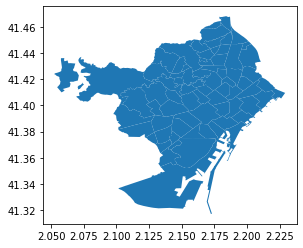

In [407]:
df_merged.plot()

### Generate centroids

In [0]:
df_merged["x"] = df_merged.centroid.x
df_merged["y"] = df_merged.centroid.y

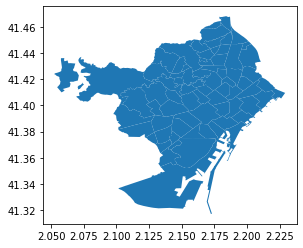

In [409]:
df_merged.plot()

### Save files

In [0]:
df_merged = df_merged.fillna(0.0)

In [0]:
df_merged.to_csv('barcelona_cleaned.csv', index=False)

### Visualize the GeoDataframe values

Text(0.5, 1.0, 'Price per neighbourhood')

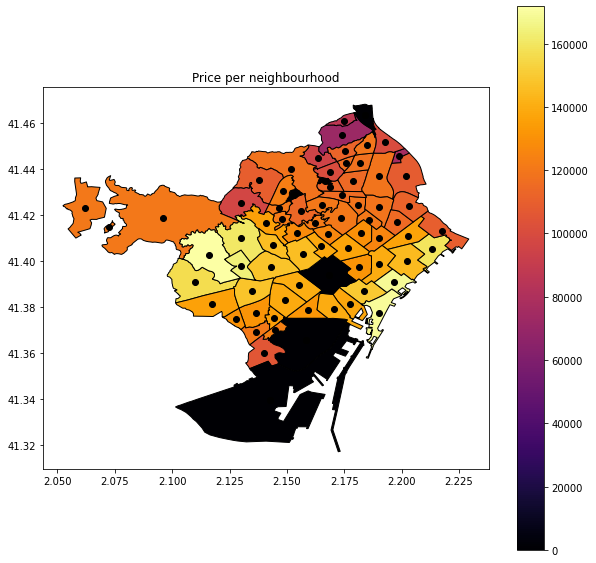

In [429]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax, column='price', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Price per neighbourhood')

Text(0.5, 1.0, 'Trees per neighbourhood')

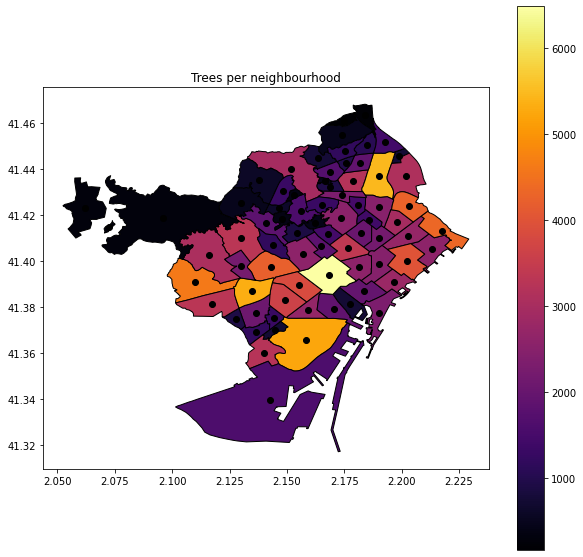

In [430]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax, column='trees_num', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Trees per neighbourhood')

Text(0.5, 1.0, 'Green spaces per neighbourhood')

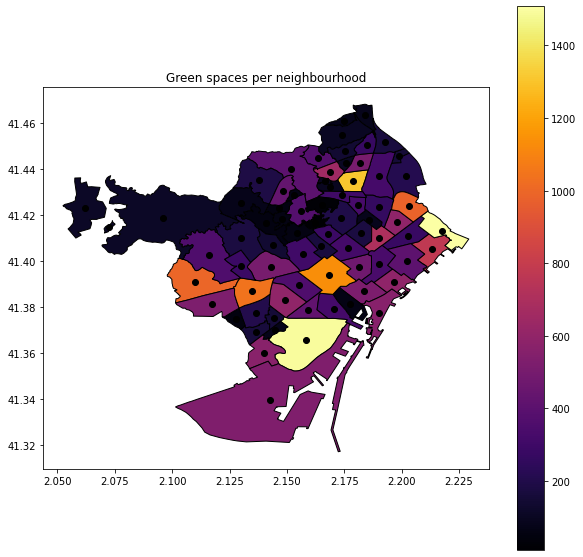

In [431]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax,column='green_spaces', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Green spaces per neighbourhood')

Text(0.5, 1.0, 'Hospitals per neighbourhood')

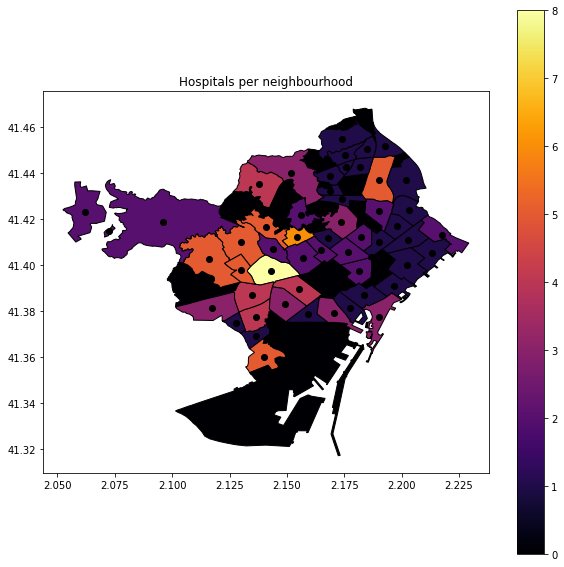

In [432]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax,column='hospitals', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Hospitals per neighbourhood')

Text(0.5, 1.0, 'Schools per habitants')

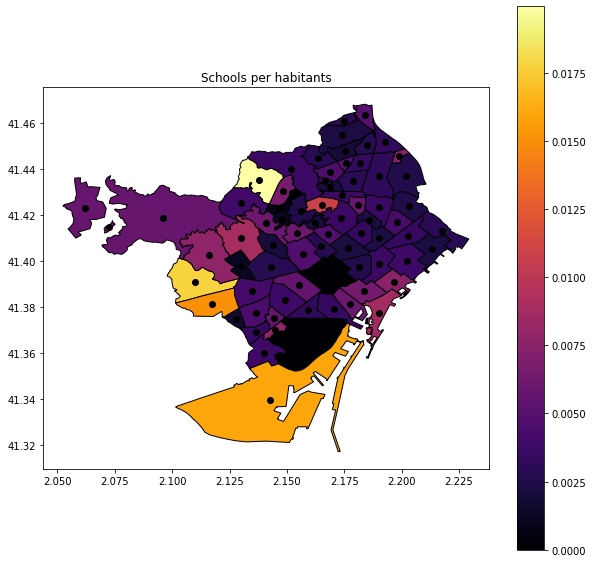

In [433]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax,column='schools', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Schools per habitants')

Text(0.5, 1.0, 'Crime per habitants')

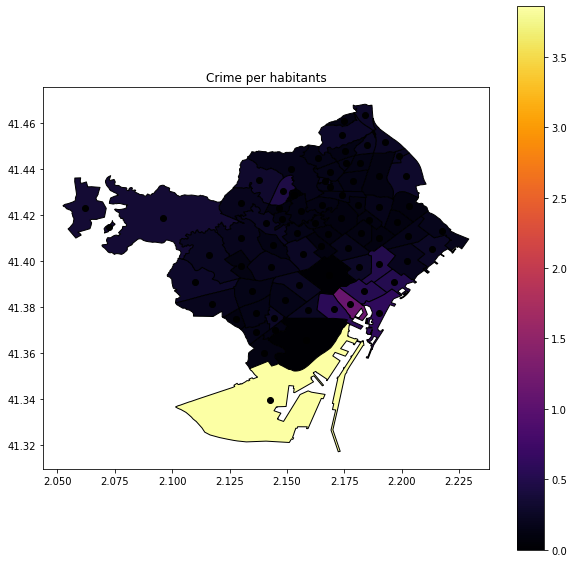

In [434]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
df_merged.plot(ax=ax, column='crime', cmap='inferno', legend=True, edgecolor='black')
df_merged.centroid.plot(ax=ax, c = 'black')
plt.title('Crime per habitants')

### Prepare the dataset for MGWR

In [0]:
bcn_y = df_merged['price'].values.reshape((-1, 1))
bcn_X = df_merged[['trees_num', 'green_spaces', 'hospitals', 'schools', 'crime']].values
bcn_u = df_merged['x']
bcn_v = df_merged['y']
bcn_coords = list(zip(bcn_u, bcn_v))

In [436]:
bcn_X

array([[7.61000000e+02, 1.51000000e+02, 0.00000000e+00, 7.24637681e-03,
        2.31832550e-01],
       [4.37000000e+02, 1.00000000e+01, 0.00000000e+00, 2.17983651e-03,
        1.25483690e-01],
       [4.35000000e+02, 8.70000000e+01, 0.00000000e+00, 3.80228137e-03,
        2.34126990e-01],
       [7.64000000e+02, 3.76000000e+02, 0.00000000e+00, 2.93685756e-03,
        1.63686590e-01],
       [1.70000000e+02, 7.70000000e+01, 0.00000000e+00, 3.01003344e-03,
        1.46327630e-01],
       [2.59000000e+03, 7.72000000e+02, 1.00000000e+00, 2.22283968e-03,
        2.71180180e-01],
       [2.96800000e+03, 4.07000000e+02, 3.00000000e+00, 3.72803124e-03,
        1.72149820e-01],
       [1.29800000e+03, 1.53000000e+02, 0.00000000e+00, 5.75447570e-03,
        2.63833800e-01],
       [6.11000000e+02, 1.89000000e+02, 4.00000000e+00, 1.99401795e-02,
        3.15095450e-01],
       [1.42800000e+03, 8.40000000e+01, 0.00000000e+00, 2.21434898e-03,
        1.31563450e-01],
       [4.62300000e+03, 9.9400

### Standardize the variables

Let's do it with StandardScaler()

In [0]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()

bcn_X_scaler = x_scaler.fit(bcn_X)
bcn_y_scaler = y_scaler.fit(bcn_y)

bcn_X_scaled = bcn_X_scaler.transform(bcn_X)
bcn_y_scaled = bcn_y_scaler.transform(bcn_y)

In [438]:
bcn_X_scaler.transform(bcn_X)

array([[-9.39716165e-01, -6.32209832e-01, -9.50357402e-01,
         7.03593624e-01, -8.42417252e-02],
       [-1.16683168e+00, -1.05428174e+00, -9.50357402e-01,
        -6.83548956e-01, -3.22054707e-01],
       [-1.16823363e+00, -8.23788569e-01, -9.50357402e-01,
        -2.39347941e-01, -7.91109921e-02],
       [-9.37613243e-01,  4.13091652e-02, -9.50357402e-01,
        -4.76287971e-01, -2.36626941e-01],
       [-1.35399170e+00, -8.53722747e-01, -9.50357402e-01,
        -4.56253515e-01, -2.75444339e-01],
       [ 3.42364963e-01,  1.22670260e+00, -3.80142961e-01,
        -6.71775336e-01,  3.74583965e-03],
       [ 6.07333069e-01,  1.34105116e-01,  7.60285921e-01,
        -2.59676509e-01, -2.17701811e-01],
       [-5.63293220e-01, -6.26222997e-01, -9.50357402e-01,
         2.95133525e-01, -1.26818356e-02],
       [-1.04486224e+00, -5.18459957e-01,  1.33050036e+00,
         4.17896599e+00,  1.01947375e-01],
       [-4.72166623e-01, -8.32768823e-01, -9.50357402e-01,
        -6.74099961e-01

In [439]:
bcn_X

array([[7.61000000e+02, 1.51000000e+02, 0.00000000e+00, 7.24637681e-03,
        2.31832550e-01],
       [4.37000000e+02, 1.00000000e+01, 0.00000000e+00, 2.17983651e-03,
        1.25483690e-01],
       [4.35000000e+02, 8.70000000e+01, 0.00000000e+00, 3.80228137e-03,
        2.34126990e-01],
       [7.64000000e+02, 3.76000000e+02, 0.00000000e+00, 2.93685756e-03,
        1.63686590e-01],
       [1.70000000e+02, 7.70000000e+01, 0.00000000e+00, 3.01003344e-03,
        1.46327630e-01],
       [2.59000000e+03, 7.72000000e+02, 1.00000000e+00, 2.22283968e-03,
        2.71180180e-01],
       [2.96800000e+03, 4.07000000e+02, 3.00000000e+00, 3.72803124e-03,
        1.72149820e-01],
       [1.29800000e+03, 1.53000000e+02, 0.00000000e+00, 5.75447570e-03,
        2.63833800e-01],
       [6.11000000e+02, 1.89000000e+02, 4.00000000e+00, 1.99401795e-02,
        3.15095450e-01],
       [1.42800000e+03, 8.40000000e+01, 0.00000000e+00, 2.21434898e-03,
        1.31563450e-01],
       [4.62300000e+03, 9.9400

In [440]:
bcn_y

array([[ 76000.],
       [121500.],
       [     0.],
       [ 94725.],
       [ 87200.],
       [159275.],
       [118250.],
       [135300.],
       [109975.],
       [120275.],
       [156875.],
       [114450.],
       [136575.],
       [119075.],
       [131675.],
       [ 96825.],
       [147775.],
       [161000.],
       [115225.],
       [150225.],
       [131500.],
       [130300.],
       [171825.],
       [ 72200.],
       [     0.],
       [135900.],
       [120675.],
       [120675.],
       [120675.],
       [116500.],
       [115650.],
       [126625.],
       [137725.],
       [109600.],
       [108400.],
       [138300.],
       [130150.],
       [113450.],
       [125600.],
       [121725.],
       [119200.],
       [131425.],
       [120700.],
       [139800.],
       [     0.],
       [144600.],
       [145950.],
       [140175.],
       [113125.],
       [140475.],
       [169175.],
       [121350.],
       [     0.],
       [     0.],
       [120675.],
       [12

In [441]:
bcn_y_scaled

array([[-1.02512744],
       [ 0.13037257],
       [-2.95519339],
       [-0.54959474],
       [-0.74069667],
       [ 1.08969153],
       [ 0.04783685],
       [ 0.48083191],
       [-0.16231177],
       [ 0.09926295],
       [ 1.02874208],
       [-0.04866644],
       [ 0.51321131],
       [ 0.06878823],
       [ 0.38877285],
       [-0.49626397],
       [ 0.79764208],
       [ 1.13349895],
       [-0.02898485],
       [ 0.85986131],
       [ 0.38432861],
       [ 0.35385389],
       [ 1.40840637],
       [-1.12163074],
       [-2.95519339],
       [ 0.49606927],
       [ 0.10942119],
       [ 0.10942119],
       [ 0.10942119],
       [ 0.00339455],
       [-0.01819172],
       [ 0.26052504],
       [ 0.54241625],
       [-0.17183513],
       [-0.20230985],
       [ 0.55701873],
       [ 0.35004455],
       [-0.07406205],
       [ 0.23449455],
       [ 0.13608658],
       [ 0.07196268],
       [ 0.38242394],
       [ 0.11005608],
       [ 0.59511213],
       [-2.95519339],
       [ 0

In [442]:
bcn_X_scaled.shape

(75, 5)

In [443]:
bcn_y_scaled.shape

(75, 1)

## Calibrate a GWR


In [0]:
bcn_gwr_selector = Sel_BW(bcn_coords, bcn_y_scaled, bcn_X_scaled)
bcn_gwr_bw = bcn_gwr_selector.search()

In [445]:
print(bcn_gwr_bw)

64.0


In [0]:
bcn_model = GWR(bcn_coords, bcn_y_scaled, bcn_X_scaled, bcn_gwr_bw)

In [0]:
bcn_results = bcn_model.fit()

In [448]:
bcn_results.aicc

186.23809769829774

In [449]:
bcn_results.aic

178.67862637518294

In [450]:
bcn_results.R2

0.5692709004910625

### Populating dataframe with results and visualizing them

In [0]:
df_results = df_merged.copy()

In [452]:
bcn_results.params

array([[ 4.73880967e-02,  2.03601022e-01,  3.43767428e-02,
         3.06422919e-01,  7.56893990e-02,  6.17306040e-01],
       [ 1.41883605e-01,  6.11447368e-02, -1.08450883e-01,
         3.06037632e-01,  8.11234849e-02,  8.06553576e-01],
       [ 2.46959658e-02,  1.86746839e-01, -7.89029288e-05,
         3.03838194e-01,  6.02168581e-02,  5.42718965e-01],
       [-3.68989258e-02,  2.26980592e-01,  1.92454254e-02,
         3.06419969e-01,  5.37496009e-02,  3.54549471e-01],
       [-6.44631400e-02,  2.46462441e-01,  4.30682316e-02,
         3.05381381e-01,  5.25199121e-02,  2.96717958e-01],
       [ 2.98851986e-01,  2.31028285e-03,  7.38125536e-03,
         3.34743261e-01,  2.96343670e-01,  5.80674264e-01],
       [ 1.28561516e-02,  2.45364726e-01, -3.15972790e-02,
         3.03609489e-01,  3.25355333e-02,  5.28771889e-01],
       [ 9.91822875e-02,  8.44855432e-02, -5.11978193e-01,
         2.97716814e-01,  3.23345781e-01, -3.32356116e-01],
       [ 1.67932306e-01,  3.75525487e-01, -1.626

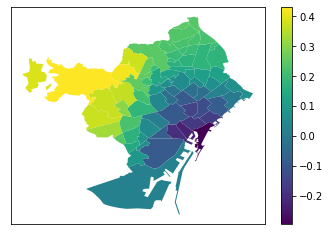

In [453]:
df_results['MGWR_trees_num'] = bcn_results.params[:, 1]
df_results.plot('MGWR_trees_num', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

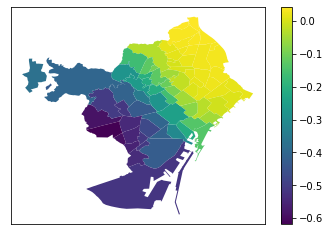

In [454]:
df_results['MGWR_green_spaces'] = bcn_results.params[:, 2]
df_results.plot('MGWR_green_spaces', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

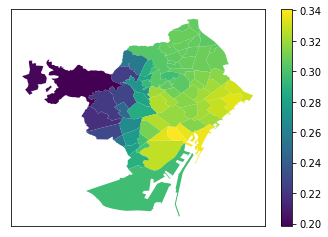

In [455]:
df_results['MGWR_hospitals'] = bcn_results.params[:, 3]
df_results.plot('MGWR_hospitals', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

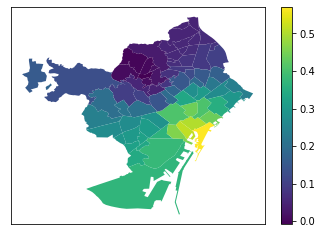

In [456]:
df_results['MGWR_schools'] = bcn_results.params[:, 4]
df_results.plot('MGWR_schools', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

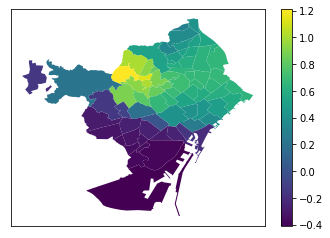

In [457]:
df_results['MGWR_crime'] = bcn_results.params[:, 5]
df_results.plot('MGWR_crime', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Local fit

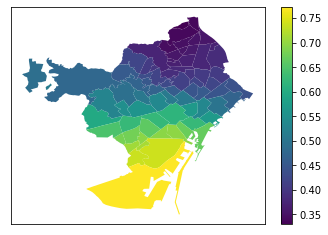

In [460]:
df_results['R2'] = bcn_results.localR2
df_results.plot('R2', legend=True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Predict price 

### Create some random numbers in a position

In [0]:
long_lat = [2.1929866, 41.3785303]
trees_num = 1000
green_spaces = 500
hospitals = 2
schools = 0.1
crime = 0.21

### Turn coordinates into array

In [462]:
pred_coords_bcn = np.asarray([long_lat])
pred_coords_bcn.shape

(1, 2)

### Scale the X array

In [0]:
x_preds = np.asarray([trees_num, green_spaces, hospitals, schools, crime])

In [464]:
X_preds_scaled = bcn_X_scaler.transform(x_preds.reshape(1, -1))
X_preds_scaled

array([[-0.77218342,  0.41249297,  0.19007148, 26.0981415 , -0.13306278]])

### Run the predictions

In [0]:
preds_bcn = bcn_model.predict(pred_coords_bcn, X_preds_scaled)

### Get the prediction and scale it back

In [466]:
preds_bcn.predictions.flatten()

array([15.32842662])

The price at that house is...

In [467]:
bcn_y_scaler.inverse_transform(preds_bcn.predictions.flatten())

array([719952.14598309])